In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler


In [2]:
car_data=pd.read_csv('car data.csv')

In [3]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
print(car_data['Seller_Type'].value_counts())
print(car_data['Transmission'].value_counts())

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [8]:
fuel_type=car_data['Fuel_Type']
seller_type=car_data['Seller_Type']
transmission_type=car_data['Transmission']
selling_price=car_data['Selling_Price']

In [9]:
from matplotlib import style

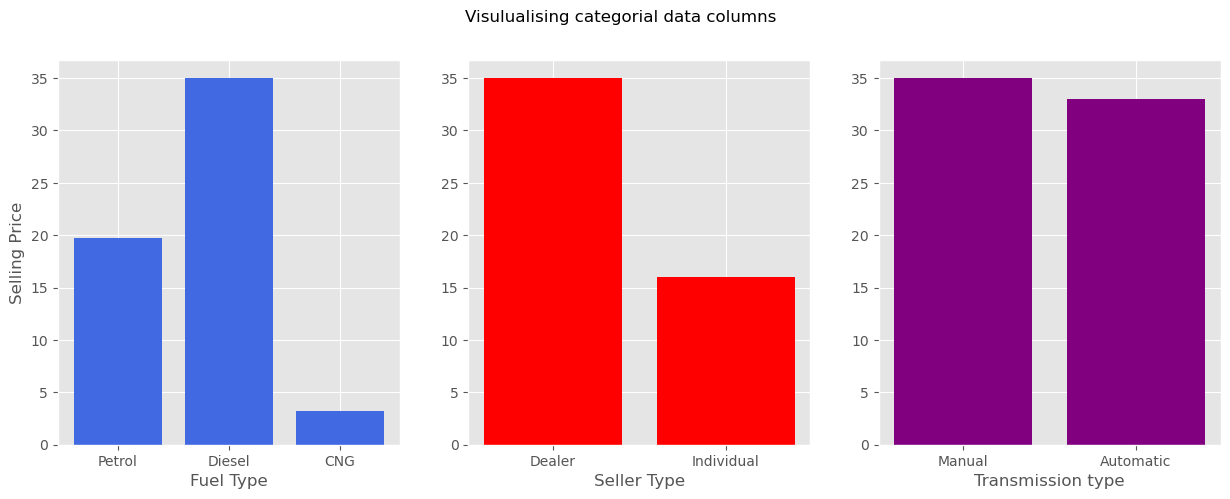

In [10]:
style.use('ggplot')
fig=plt.figure(figsize=(15,5))
fig.suptitle('Visulualising categorial data columns')
plt.subplot(1,3,1)
plt.bar(fuel_type, selling_price, color='royalblue' )
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price")
plt.subplot(1,3,2)
plt.bar(seller_type, selling_price, color='red')
plt.xlabel("Seller Type")
plt.subplot(1,3,3)
plt.bar(transmission_type, selling_price, color='purple')
plt.xlabel("Transmission type")
plt.show()

<Axes: xlabel='Transmission', ylabel='Selling_Price'>

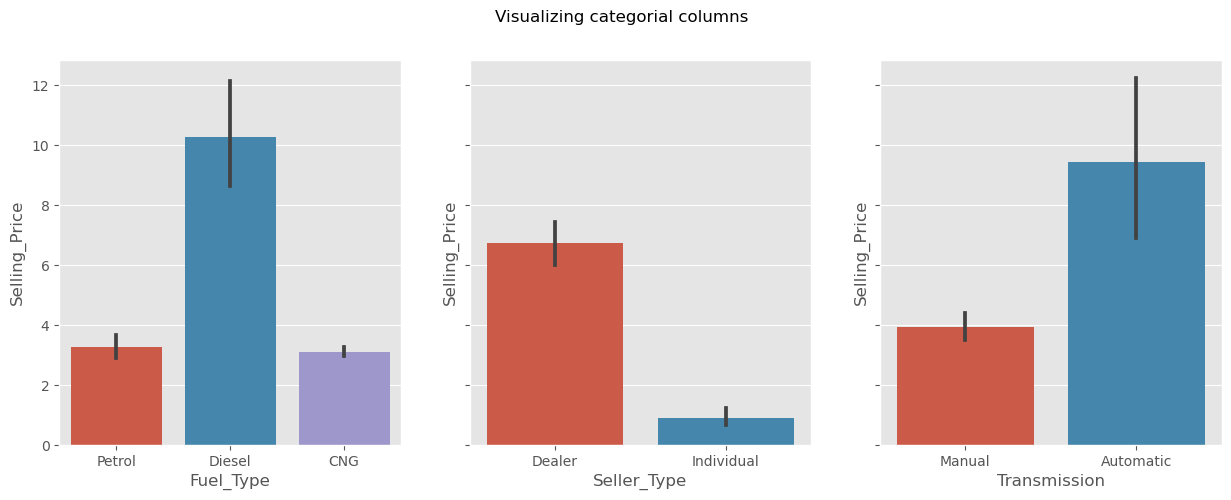

In [11]:
fig, axes=plt.subplots(1,3,figsize=(15,5),sharey=True)
fig.suptitle('Visualizing categorial columns')
sns.barplot(x=fuel_type, y=selling_price, ax=axes[0])
sns.barplot(x=seller_type, y=selling_price, ax=axes[1])
sns.barplot(x=transmission_type, y=selling_price, ax=axes[2])

In [12]:
petrol_data=car_data.groupby('Fuel_Type').get_group('Petrol')
petrol_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,239.000000,239.000000,239.000000,239.000000,239.000000
mean,2013.539749,3.264184,5.583556,33528.937238,0.050209
std,3.042674,3.135537,5.290685,40308.984886,0.270368
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.600000,0.940000,13850.000000,0.000000
50%,2014.000000,2.650000,4.600000,25870.000000,0.000000
75%,2016.000000,5.200000,7.980000,44271.000000,0.000000
max,2017.000000,19.750000,23.730000,500000.000000,3.000000


In [13]:
seller_data=car_data.groupby('Seller_Type').get_group('Dealer')
seller_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,195.000000,195.000000,195.000000,195.000000,195.000000
mean,2013.712821,6.721692,10.886308,39850.133333,0.020513
std,2.686275,5.136088,8.806563,24860.401003,0.142111
min,2003.000000,1.050000,2.690000,2071.000000,0.000000
25%,2012.000000,3.750000,6.580000,22148.500000,0.000000
50%,2014.000000,5.250000,8.500000,39485.000000,0.000000
75%,2016.000000,7.625000,13.460000,51785.500000,0.000000
max,2018.000000,35.000000,92.600000,197176.000000,1.000000


In [14]:
#manual encoding
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}}, inplace=True)
#one hot coding
car_data=pd.get_dummies(car_data, columns=['Seller_Type','Transmission'], drop_first=True)

In [15]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,False,True
1,sx4,2013,4.75,9.54,43000,1,0,False,True
2,ciaz,2017,7.25,9.85,6900,0,0,False,True
3,wagon r,2011,2.85,4.15,5200,0,0,False,True
4,swift,2014,4.60,6.87,42450,1,0,False,True


In [16]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder


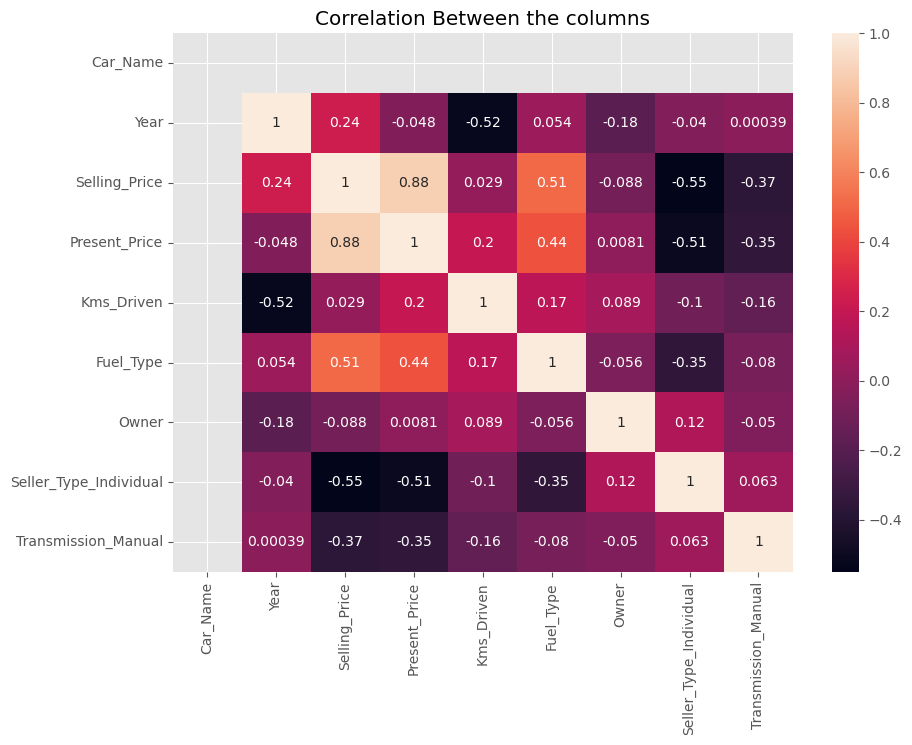

In [17]:

# Replace non-numeric values with NaN
car_data_numeric = car_data.apply(pd.to_numeric, errors='coerce')

# Create the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(car_data_numeric.corr(), annot=True)
plt.title('Correlation Between the columns')
plt.show()


<Axes: title={'center': 'Correlation between present price and selling price '}, xlabel='Present_Price', ylabel='Selling_Price'>

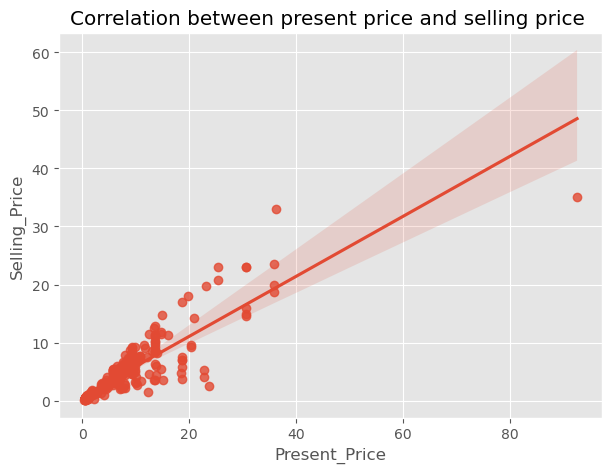

In [18]:
fig=plt.figure(figsize=(7,5))
plt.title('Correlation between present price and selling price ')
sns.regplot(x='Present_Price',y='Selling_Price',data=car_data)

In [19]:
X=car_data.drop(['Car_Name','Selling_Price'],axis=1)
y=car_data['Selling_Price']

In [20]:
print("shape of x is: ",X.shape)
print("shape of y is: ",y.shape)

shape of x is:  (301, 7)
shape of y is:  (301,)


In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [22]:
print("X_test shape:",X_test.shape)
print("X_train shape:",X_train.shape)

print("y_test shape:",y_test.shape)

print("y_train shape:",y_train.shape)


X_test shape: (91, 7)
X_train shape: (210, 7)
y_test shape: (91,)
y_train shape: (210,)


In [23]:
scaler=StandardScaler()


In [24]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [25]:
model=LinearRegression()

In [26]:
model.fit(X_train,y_train)

LinearRegression()

In [27]:
pred=model.predict(X_test)

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [29]:
from sklearn import metrics

# Assuming pred and y_test are numpy arrays or pandas Series
# Convert them to arrays if they are not already

# Check the lengths of pred and y_test
if len(pred) == len(y_test):
    # Calculate and print metrics
    print("MAE: ", metrics.mean_absolute_error(pred, y_test))
    print("MSE: ", metrics.mean_squared_error(pred, y_test))
    print("R2 score: ", metrics.r2_score(pred, y_test))
else:
    print("Error: The number of samples in pred and y_test is inconsistent.")


MAE:  1.2581404706473376
MSE:  3.4932860262251486
R2 score:  0.8294933369778814


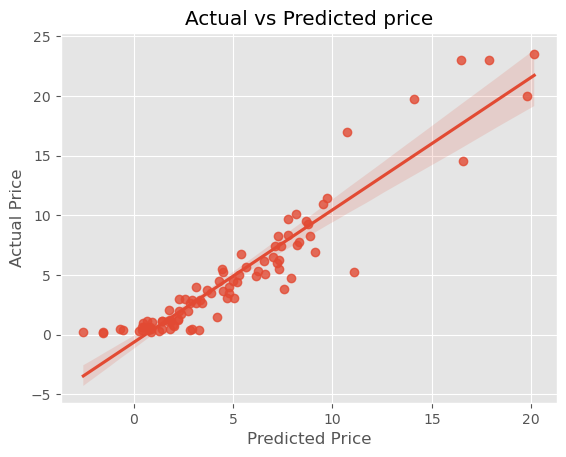

In [30]:
sns.regplot(x=pred,y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("Actual vs Predicted price")
plt.show()